<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-加载数据" data-toc-modified-id="1-加载数据-1">1 加载数据</a></span></li><li><span><a href="#2-EDA" data-toc-modified-id="2-EDA-2">2 EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-标签平衡性可视化检测" data-toc-modified-id="2.1-标签平衡性可视化检测-2.1">2.1 标签平衡性可视化检测</a></span></li><li><span><a href="#2.2-输出可视化数据分析报告" data-toc-modified-id="2.2-输出可视化数据分析报告-2.2">2.2 输出可视化数据分析报告</a></span></li><li><span><a href="#2.3-指定特征值和目标值" data-toc-modified-id="2.3-指定特征值和目标值-2.3">2.3 指定特征值和目标值</a></span></li></ul></li><li><span><a href="#3-拆分数据集" data-toc-modified-id="3-拆分数据集-3">3 拆分数据集</a></span></li><li><span><a href="#4-建模预测" data-toc-modified-id="4-建模预测-4">4 建模预测</a></span></li><li><span><a href="#5-计算混淆矩阵并可视化" data-toc-modified-id="5-计算混淆矩阵并可视化-5">5 计算混淆矩阵并可视化</a></span><ul class="toc-item"><li><span><a href="#5.1-可视化方法1——自定义plot函数" data-toc-modified-id="5.1-可视化方法1——自定义plot函数-5.1">5.1 可视化方法1——自定义plot函数</a></span></li><li><span><a href="#5.2-可视化方法2——调用sklearn-API" data-toc-modified-id="5.2-可视化方法2——调用sklearn-API-5.2">5.2 可视化方法2——调用sklearn API</a></span></li></ul></li><li><span><a href="#6-可视化精确率与召回率曲线" data-toc-modified-id="6-可视化精确率与召回率曲线-6">6 可视化精确率与召回率曲线</a></span><ul class="toc-item"><li><span><a href="#6.1-可视化方法1——自定义函数" data-toc-modified-id="6.1-可视化方法1——自定义函数-6.1">6.1 可视化方法1——自定义函数</a></span></li><li><span><a href="#6.2-可视化方法2——调用sklearn-API" data-toc-modified-id="6.2-可视化方法2——调用sklearn-API-6.2">6.2 可视化方法2——调用sklearn API</a></span></li></ul></li><li><span><a href="#7-可视化LR模型中特征重要性" data-toc-modified-id="7-可视化LR模型中特征重要性-7">7 可视化LR模型中特征重要性</a></span></li><li><span><a href="#8-总结：" data-toc-modified-id="8-总结：-8">8 总结：</a></span></li></ul></div>

信用卡欺诈分析：    
数据集：2013年9月份两天时间内的信用卡交易数据    
284807笔交易，492笔欺诈行为    
https://www.kaggle.com/mlg-ulb/creditcardfraud    
数据样本包括了28个特征V1，V2，……V28，以及交易时间Time和交易金额Amount    
因为数据隐私，28个特征值是通过PCA变换得到的结果。    
需要预测 每笔交易的分类Class，该笔交易是否为欺诈     
Class=0为正常（非欺诈），Class=1代表欺诈    

In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, plot_precision_recall_curve

sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 1 加载数据

In [3]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 2 EDA

## 2.1 标签平衡性可视化检测

0    0.998273
1    0.001727
Name: Class, dtype: float64

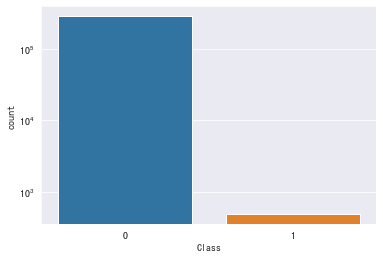

In [6]:
ax = sns.countplot(x='Class', data=df)
ax.set_yscale('log')
df['Class'].value_counts(normalize=True)

正样本只有0.17%，严重不均衡。

## 2.2 输出可视化数据分析报告

In [7]:
# 如果report.html不存在，则生成数据分析报告文件
EXIST_PATH = "report.html"
if not os.path.exists(EXIST_PATH):
    report = pp.ProfileReport(df)
    report.to_file(EXIST_PATH)

## 2.3 指定特征值和目标值

In [8]:
df = df.drop_duplicates()
target = df['Class'].values
drop_cols = ['Time', 'Class']
features = df.drop(columns=drop_cols).values

# 3 拆分数据集

In [9]:
# 超参数
RANDOM_STATE = 30
TEST_SIZE = 0.3
# 30% 作为测试集
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    random_state=RANDOM_STATE,
                                                    test_size=TEST_SIZE)

# 4 建模预测

In [10]:
# 增加多项式特征后，模型效果变差
# clf = Pipeline(
#     [('scaler', StandardScaler()),
#      ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
#      ('logisticregression',
#       LogisticRegression(
#           solver='sag', class_weight={
#               0: 0.1,
#               1: 0.9
#           }, max_iter=1000))],
#     verbose=False)

In [11]:
# 增加多项式后，模型效果变差
clf = Pipeline(
    [('scaler', StandardScaler()),
     ('logisticregression',
      LogisticRegression(class_weight={
          0: 0.09,
          1: 0.91
      }, max_iter=1000))],
    verbose=False)
clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight={0: 0.09, 1: 0.91},
                                    max_iter=1000))])

In [12]:
y_pred = clf.predict(x_test)
np.bincount(y_pred)

array([84986,   132])

# 5 计算混淆矩阵并可视化

In [13]:
# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[84959,    33],
       [   27,    99]])

## 5.1 可视化方法1——自定义plot函数

In [32]:
# 显示误差矩阵
def my_plot_confusion_matrix(conf_matrix, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - conf_matrix : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    plt.figure()
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j,
                 i,
                 conf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

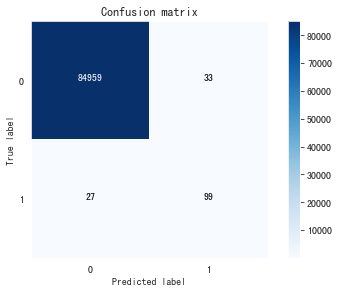

In [33]:
my_plot_confusion_matrix(conf_matrix,
                         classes=np.unique(target),
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues)

## 5.2 可视化方法2——调用sklearn API

In [16]:
from sklearn.metrics import plot_confusion_matrix

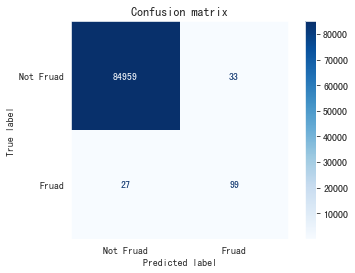

In [30]:
class_names = ['Not Fruad', 'Fruad']
plot_confusion_matrix(clf,
                      x_test,
                      y_test,
                      labels=np.unique(target),
                      display_labels=class_names,
                      cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.grid(False)

# 6 可视化精确率与召回率曲线

In [18]:
# 预测样本的置信分数
probas_pred = clf.decision_function(x_test)
probas_pred

array([-5.70744614, -6.98244191, -6.09909436, ..., -5.75814164,
       -8.1117991 , -6.77032928])

## 6.1 可视化方法1——自定义函数

+ 精确率（precision）：正确预测为正的占全部预测为正的比例
+ 召回率（recall）：正确预测为正的占全部实际为正的比例

In [35]:
# precision-recall curve
def my_plot_precision_recall(y_test, probas_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, probas_pred)
    plt.step(recall, precision, color='cyan', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='cyan')
    plt.plot(recall, precision, linewidth=2, color='red')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show()

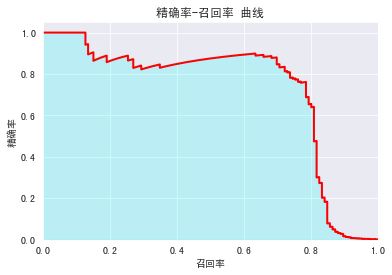

In [36]:
my_plot_precision_recall(y_test, probas_pred)

## 6.2 可视化方法2——调用sklearn API

Text(0.5, 1.0, '精确率-召回率 曲线')

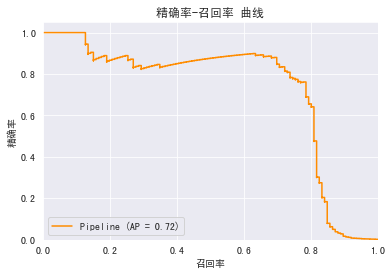

In [40]:
disp = plot_precision_recall_curve(clf, x_test, y_test, color='darkorange')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('召回率')
plt.ylabel('精确率')
disp.ax_.set_title('精确率-召回率 曲线')

# 7 可视化LR模型中特征重要性

In [22]:
# 用权重（斜率）代表模型中特征重要性
coeffs = clf[-1].coef_
coeffs

array([[ 0.3318581 , -0.11899197, -0.04042754,  1.00276195,  0.0718499 ,
        -0.13185432, -0.11356879, -0.34812469, -0.23787525, -0.60006401,
         0.11998351, -0.38616198, -0.27632965, -0.71413038, -0.09362601,
        -0.22830859, -0.03533153, -0.06648591,  0.16016293, -0.12527817,
         0.13646908,  0.15208313, -0.03086748,  0.02789145,  0.12529063,
        -0.19786302, -0.18683386, -0.05960349,  0.09396907]])

In [23]:
coeffs.shape

(1, 29)

In [24]:
cols = df.drop(columns=drop_cols).columns.tolist()
cols += ['c_%d' % i for i in range(coeffs.shape[1] - len(cols))]
len(cols)

29

In [25]:
# 为了显示出来的时候占用小一点页面，所以在一行多列中展示，后面需要进行转置
df_co = pd.DataFrame(abs(coeffs), index=["coef_"], columns=cols)
df_co

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
coef_,0.331858,0.118992,0.040428,1.002762,0.07185,0.131854,0.113569,0.348125,0.237875,0.600064,...,0.125278,0.136469,0.152083,0.030867,0.027891,0.125291,0.197863,0.186834,0.059603,0.093969


In [26]:
# 转置df
df_co = df_co.T

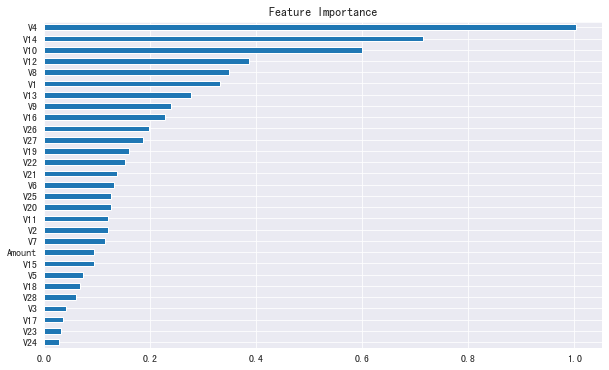

In [27]:
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_[:30].plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

# 8 总结：
+ 混淆矩阵可视化以及精确率-召回率曲线可视化，除了自定义函数绘制，目前sklearn中也有了API，可以直接调用。
+ 本次作业学到了用$y=w_1x_1 + w_2x_2 + ... + w_nx_n$中的权重w来作为特征重要性进行展示。